In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

# 11.1 理论基础

In [4]:
# 图像金字塔：是由一幅图像的多个不同分辨率的子图构成的图像集合。该组图像是由单个图像不断降采样产生的，最小的图像可能仅仅一个像素点
# 图像金字塔越往上，分辨率越低，通常每上移一级，图像的宽和高都降为原来的1/2
# 最简单的图像金字塔可以通过不断删除图像偶数行和偶数列得到
# 也可先对原始图像滤波，得到原始图像的近似图像，然后将近似图像偶数行和偶数列删除获取下采样结果，有多种滤波器可选：
# 邻域滤波器：该滤波器能够产生平均金字塔
# 高斯滤波器：得到高斯金字塔，这是opencv函数cv2.pyrDown()采样的方式

# 高斯金字塔是通过不断使用高斯金字塔滤波，采样所产生的：原始图-高斯滤波-下采样-高斯滤波-下采样-……
# 在向上采样的过程中，通常是将图像的宽高变为原来的2倍，要在结果途中补充大量像素点，称为插值处理
# 最邻近插值就是用最邻近的像素点给当前没有值的像素点赋值
# 有一种常见的上采样，对像素点以补零方式插值，通常在每个像素点的右侧插入值为0的列，下方插入值为0的行
# 接下来使用高斯滤波对补零后的图像进行滤波处理，获取上采样图
# 注意，此时图像3/4像素点的值都是0，所以要将高斯滤波器系数*4，保证得到的像素值范围在其原有像素值范围内

# 11.2 pyrDown函数及使用

In [5]:
# opencv提供了函数cv2.pyrDown()实现图像高斯金字塔中的下采样
# dst = cv2.pyrDown(src[,dstsize[,borderType]])
# dst：目标图像
# src：原始图像
# dstsize：目标图像的大小
# borderType：边界类型，默认值为BORDER_DEFAULT，这里仅支持BORDER_DEFAULT

# 默认情况下，输出图片大小为Size((src.cols+1)/2,(src.rows+1)/2)
# 在任何情况下，图像尺寸必须满足：
# ｜dst.width*2-src.cols|<=2
# |dst.height*2-src.rows|<=2

# cv2.pyrDrown()函数先对原始图像进行高斯滤波变换，获取近似图像，然后抛弃偶数行和偶数列实现下采样

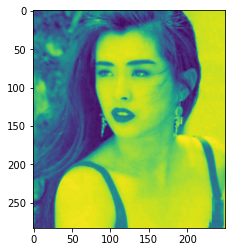

In [7]:
# 使用cv2.pyrDown()进行下采样，观察结果
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
r1 = cv2.pyrDown(wzx)
r2 = cv2.pyrDown(r1)
r3 = cv2.pyrDown(r2)
img_show(r1)

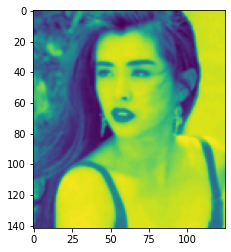

In [8]:
img_show(r2)

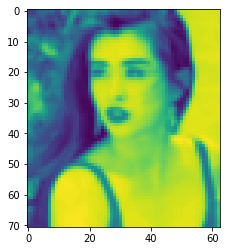

In [9]:
img_show(r3)

# 11.3 pyrUp函数及使用

In [10]:
# opencv中使用函数cv2.pyrUp()实现图像金字塔操作中的上采样：
# dst = cv2.pyrUp(src[,dstsize[,borderType]])
# dst：原始图像
# src：目标图像
# dstsize：目标图像大小
# borderType：边界类型，默认值为BORDER_DEFAULT，这里仅支持BORDER_DEFAULT

# 默认情况下，输出图片大小为Size(src.cols*2,src.rows*2)
# 在任何情况下，图像尺寸必须满足：
# ｜dst.width-src.cols*2|<=mod(dst.width,2)
# |dst.height-src.rows*2|<=mod(dst.height,2)

# 上采样时，对每个像素右侧、下方分别插入值为0的列和行，然后对新图片进行高斯滤波，得到上采样图
# 注意：为保证像素区间一致，需将高斯滤波器系数*4

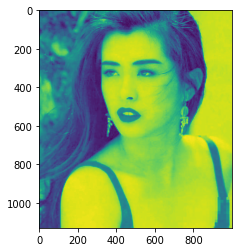

In [11]:
# 使用函数cv2.pyrUp()进行上采样，观察结果
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
r1 = cv2.pyrUp(wzx)
r2 = cv2.pyrUp(r1)
r3 = cv2.pyrUp(r2)
img_show(r1)

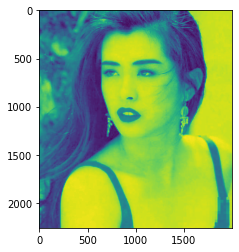

In [12]:
img_show(r2)

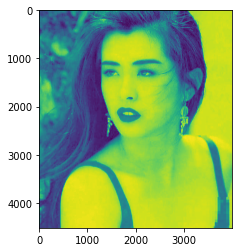

In [13]:
img_show(r3)

# 11.4 采样可逆性的研究

In [14]:
# 图像经过上采样，下采样后大小可以返回原来值，但像素值不能恢复原有值，也就是说上采样和下采样是不可逆的
# 可以通过上采样，下采样图与原始图做减法得到差值图diff

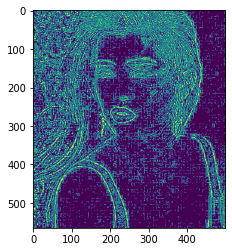

In [17]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
up = cv2.pyrUp(wzx)
dn = cv2.pyrDown(up)
diff = dn-wzx
img_show(diff)

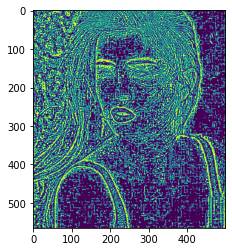

In [26]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
dn = cv2.pyrDown(wzx)
up = cv2.pyrUp(dn)
up = up[:up.shape[0]-1,:]  # 可能像素多一行
diff = up-wzx
img_show(diff)

# 11.5 拉普拉斯金字塔

### 11.5.1 定义

In [27]:
# 高斯金字塔是对图像进行下采样，拉普拉斯金字塔是对图像进行上采样
# 为了在向上采样时能恢复较高分辨率的原始图像，就要获取在下采样过程中丢失的信息（删除偶数行列），这些丢失的信息就构成了拉普拉斯金字塔
# Li = Gi - pyrUp(Gi+1)
# Li：拉普拉斯金字塔中的第i层
# Gi：高斯金字塔中的第i层
# 拉普拉斯金字塔中第i层 = 高斯金字塔中第i层 - 高斯金字塔中第i+1层的上采样结果

In [37]:
# 使用cv2.pyrDown()和cv2.pyrUp()构造拉普拉斯金字塔
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
wzx = wzx[:wzx.shape[0]-1]
G0 = wzx
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)
G3 = cv2.pyrDown(G2)
L0 = G0-cv2.pyrUp(G1)
L1 = G1-cv2.pyrUp(G2)
# L2 = G2-cv2.pyrUp(G3)
print("L0.shap\n",L0.shape)
print("L1.shap\n",L1.shape)
# print("L2.shap\n",L2.shape)

L0.shap
 (564, 500)
L1.shap
 (282, 250)


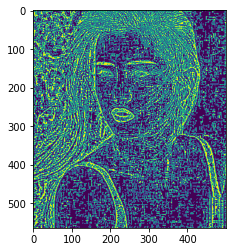

In [38]:
img_show(L0)

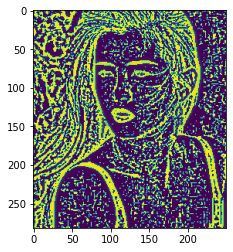

In [39]:
img_show(L1)

### 11.5.2 应用

In [40]:
# 拉普拉斯金子塔的作用在于，能恢复高分辨率图像
# G0 = L0 + cv2.PyrUp(G1)

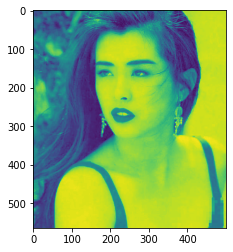

In [45]:
# 编写程序，使用拉普拉斯金字塔及高斯金字塔恢复原始图像
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg",cv2.IMREAD_GRAYSCALE)
wzx = wzx[:wzx.shape[0]-1]
G0 = wzx
G1 = cv2.pyrDown(G0)
G2 = cv2.pyrDown(G1)
L0 = G0-cv2.pyrUp(G1)
L1 = G1-cv2.pyrUp(G2)
R0 = L0 + cv2.pyrUp(G1)
img_show(G0)

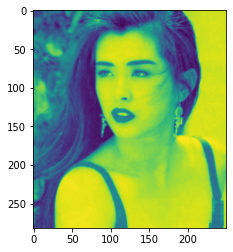

In [46]:
img_show(G1)

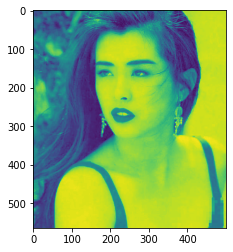

In [47]:
img_show(R0)